<a href="https://colab.research.google.com/github/AhmadThaifurproject/API_F55122014/blob/master/Quiz_PCD_Ahmad%20Thaifur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance
import random
import matplotlib.pyplot as plt


# Membaca gambar menggunakan OpenCV
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/gambar quiz.jpeg')

In [14]:
# Edge detection menggunakan Canny
canny = cv2.Canny(image, 100, 200)


In [15]:
# Random cropping
random_height, random_width = 100, 100
x = random.randint(0, image.shape[1] - random_width)
y = random.randint(0, image.shape[0] - random_height)
random_cropped = image[y:y+random_height, x:x+random_width]

In [16]:
# Half-size center cropping
center_cropped = image[image.shape[0]//4:image.shape[0]//4*3, image.shape[1]//4:image.shape[1]//4*3]


In [17]:
# Transformasi warna
image_pil = Image.fromarray(image)
inverted_image = ImageEnhance.Color(image_pil).enhance(0) # Putih jadi hitam, hitam jadi putih


In [18]:
# Noise
noise = np.zeros_like(image, np.uint8)
cv2.randu(noise, 0, 255)
salt_pepper = cv2.bitwise_and(cv2.bitwise_or(image, noise), cv2.bitwise_not(noise))
gaussian_noise = cv2.GaussianBlur(image, (5, 5), 0)


In [19]:
# Transformasi warna
image_pil = Image.fromarray(image)
inverted_image = ImageEnhance.Color(image_pil).enhance(0) # Putih jadi hitam, hitam jadi putih


In [20]:
# Transformasi geometri
rows, cols = image.shape[:2]

In [21]:
# Rotasi
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated = cv2.warpAffine(image, rotation_matrix, (cols, rows))


In [22]:
# Flip vertikal dan horizontal
flipped_vertical = cv2.flip(image, 0)
flipped_horizontal = cv2.flip(image, 1)


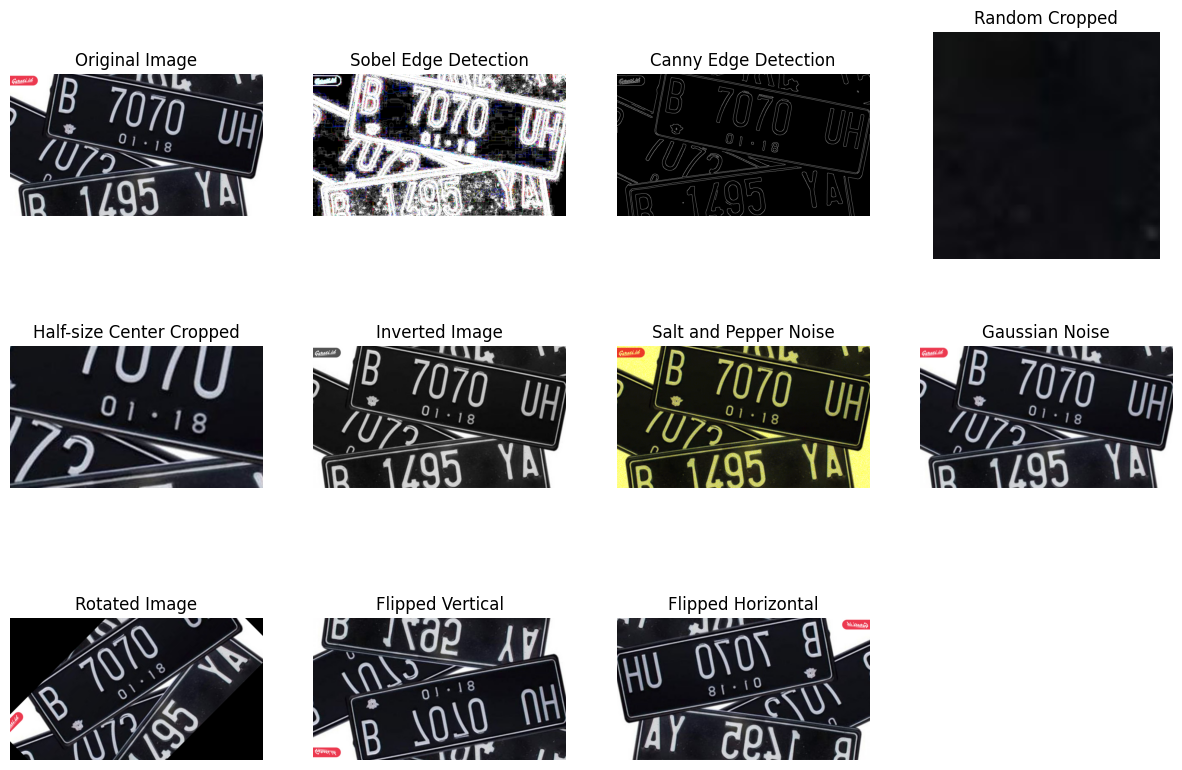

In [23]:
# Menampilkan gambar hasil
plt.figure(figsize=(15, 10))

plt.subplot(3, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(cv2.cvtColor(sobel_combined, cv2.COLOR_BGR2RGB))
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(cv2.cvtColor(random_cropped, cv2.COLOR_BGR2RGB))
plt.title('Random Cropped')
plt.axis('off')

plt.subplot(3, 4, 5)
plt.imshow(cv2.cvtColor(center_cropped, cv2.COLOR_BGR2RGB))
plt.title('Half-size Center Cropped')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.imshow(cv2.cvtColor(np.array(inverted_image), cv2.COLOR_BGR2RGB))
plt.title('Inverted Image')
plt.axis('off')

plt.subplot(3, 4, 7)
plt.imshow(cv2.cvtColor(salt_pepper, cv2.COLOR_BGR2RGB))
plt.title('Salt and Pepper Noise')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(cv2.cvtColor(gaussian_noise, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(3, 4, 9)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.axis('off')

plt.subplot(3, 4, 10)
plt.imshow(cv2.cvtColor(flipped_vertical, cv2.COLOR_BGR2RGB))
plt.title('Flipped Vertical')
plt.axis('off')

plt.subplot(3, 4, 11)
plt.imshow(cv2.cvtColor(flipped_horizontal, cv2.COLOR_BGR2RGB))
plt.title('Flipped Horizontal')
plt.axis('off')

plt.show()